# ML_SP22_Project_3 (CNN)

### Due Date: 5/16 23:59 pm

In [1]:
import sys
import os
import platform 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

### The goal for this Project is to practice running CNN using a set of dog and cat image

***Make sure you fill in the blank inside the TODO section and try at least two different choices for the following parameters. Summarize your findings briefly at the end of the notebook***

1. Define a first model, try two epoch choices and two batch size.
2. Add dropout to the first model to see if it helps or not, pick one of the epoch and batch size you had before
3. Try a second model with slighly different model arhitecture
4. Summarize your findings

### Loading the datasets

In [3]:
# download the dogsvscats.zip, save it under your notebook directory
# or somewhere else, change base_dir to where you save the datasets
base_dir = "./dogsvscats"

In [4]:
train_dataset = image_dataset_from_directory(
         os.path.join(base_dir, "train"),
        image_size=(180, 180),
        batch_size=32)

Found 2000 files belonging to 2 classes.


In [5]:
validation_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "validation"),
        image_size=(180, 180),
        batch_size=32)

Found 1000 files belonging to 2 classes.


In [6]:
test_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "test"),
        image_size=(180, 180),
        batch_size=1000)

Found 1000 files belonging to 2 classes.


In [7]:
images, labels = list(train_dataset.take(1))[0]
class_names = train_dataset.class_names

Text(0.5, 1.0, 'cat')

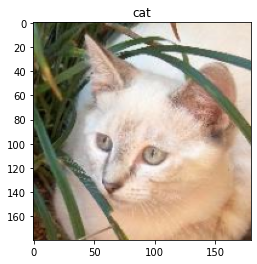

In [8]:
idx = 2
plt.imshow(images[idx].numpy().astype("uint8"))
plt.title(class_names[labels[idx].numpy()])

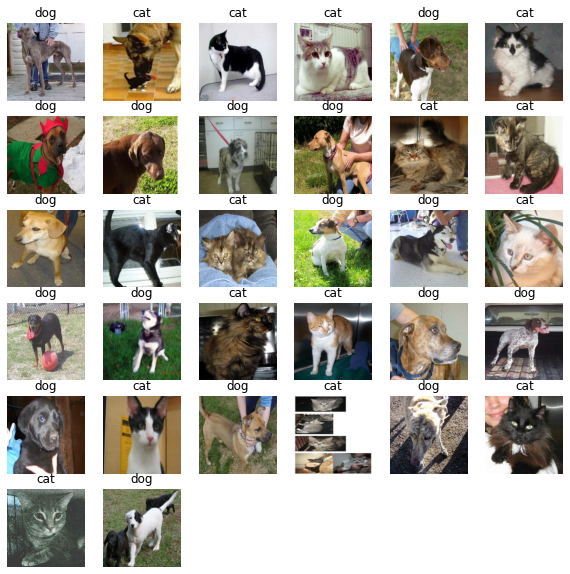

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(32):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i].numpy()])
    plt.axis("off")

# Plotting the images
plt.show()

### Define your first CNN model

In [11]:
inputs = keras.Input(shape=(180, 180, 3)) #input feature map is 180x180x3 for the image pix and 3 for RGB

x = layers.Rescaling(1./255)(inputs) #adjust scale to 1/255
x = layers.BatchNormalization()(x)
x = layers.Conv2D(16, 3, activation='relu')(inputs)#convolution extracts 16 filters that ar 3x3 max-pooling layer with 2x2
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x )#convolution extracts 32 filters that ar 3x3 max-pooling layer with 2x2
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x) #convolution extracts 64 filters that ar 3x3 max-pooling layer with 2x2
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(0.2)(x) #dropout to prevent overfitting
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x) # fully conntected layer with relu activation and 512 hidden units
outputs = layers.Dense(10, activation="softmax")(x) #sofmax:0~10 compressed for categorical

model = keras.Model(inputs, outputs)

### Comiple the model

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        18496 

### Running the first model

In [12]:
# increase epochs
history = model.fit(
    train_dataset,
    epochs=23, 
    validation_data=validation_dataset)

Epoch 1/23
63/63 [==============================] - 18s 273ms/step - loss: 96.3876 - accuracy: 0.5135 - val_loss: 0.6966 - val_accuracy: 0.5930
Epoch 2/23
63/63 [==============================] - 17s 264ms/step - loss: 0.6206 - accuracy: 0.6570 - val_loss: 0.7149 - val_accuracy: 0.6030
Epoch 3/23
63/63 [==============================] - 17s 266ms/step - loss: 0.5670 - accuracy: 0.7350 - val_loss: 0.7523 - val_accuracy: 0.6000
Epoch 4/23
63/63 [==============================] - 16s 261ms/step - loss: 0.4058 - accuracy: 0.8080 - val_loss: 0.8239 - val_accuracy: 0.6030
Epoch 5/23
63/63 [==============================] - 17s 270ms/step - loss: 0.2686 - accuracy: 0.8960 - val_loss: 0.9233 - val_accuracy: 0.6050
Epoch 6/23
63/63 [==============================] - 17s 262ms/step - loss: 0.1721 - accuracy: 0.9415 - val_loss: 1.1928 - val_accuracy: 0.6310
Epoch 7/23
63/63 [==============================] - 17s 268ms/step - loss: 0.1484 - accuracy: 0.9550 - val_loss: 1.1429 - val_accuracy: 0.600

### Now, look at the testing dataset

In [17]:
test_images, test_labels = list(test_dataset.take(1))[0]

In [18]:
class_names

['cat', 'dog']

***Predict one image at a time***

Text(0.5, 1.0, 'cat')

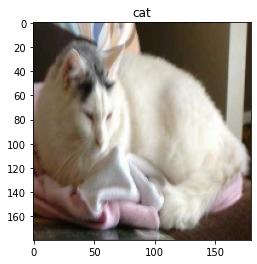

In [19]:
idx = 50
plt.imshow(test_images[idx].numpy().astype("uint8"))
plt.title(class_names[test_labels[idx].numpy()])

In [20]:
img = test_images[idx]
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [21]:
print(img_array.shape)
print(img_batch.shape)

(180, 180, 3)
(1, 180, 180, 3)


In [22]:
prediction = model.predict(img_batch)

In [23]:
print(prediction)

[[7.9329211e-01 2.0665650e-01 1.2072805e-06 8.6616654e-07 7.9959127e-06
  6.3398297e-06 4.4953981e-06 2.4684052e-05 4.4066628e-06 1.3946189e-06]]


### Evaluate your first model out-of-sample

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 46ms/step - loss: 2.0774 - accuracy: 0.6400
Test accuracy: 0.640


### Try different choices of epoch, batch size for your first model

In [13]:
# tried diffecnt batch sizes and epochs for first model
train_dataset = image_dataset_from_directory(
         os.path.join(base_dir, "train"),
        image_size=(180, 180),
        batch_size=20)
validation_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "validation"),
        image_size=(180, 180),
        batch_size=20)
history = model.fit(   # tried 2000 images =batch size(20) * steps (100)
    train_dataset,
    steps_per_epoch=100,
    epochs=3, 
    validation_data=validation_dataset, # tried 1000 images =batch size(20) * steps (50)
    validation_steps=50,
    verbose=2)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Epoch 1/3
100/100 - 16s - loss: 13.1847 - accuracy: 0.5215 - val_loss: 0.7020 - val_accuracy: 0.5800 - 16s/epoch - 164ms/step
Epoch 2/3
100/100 - 16s - loss: 0.6708 - accuracy: 0.6290 - val_loss: 0.7461 - val_accuracy: 0.5580 - 16s/epoch - 156ms/step
Epoch 3/3
100/100 - 16s - loss: 0.5658 - accuracy: 0.7045 - val_loss: 0.7949 - val_accuracy: 0.5740 - 16s/epoch - 159ms/step


### Try a second model with slightly different architecture (no need to be very complicated)

In [14]:
import tensorflow as tf
model1 = tf.keras.Sequential([                             
    # due to the color imiage RGB needed 3.
    tf.keras.layers.Conv2D(32, (3,3), padding="same",activation='relu', input_shape=(180,180,3)),
    tf.keras.layers.MaxPooling2D( (2,2) ),
    # more interim analysis to improve the learning effect
    tf.keras.layers.Conv2D(64, (3,3), padding="same",activation='relu'),
    tf.keras.layers.MaxPooling2D( (2,2) ),
    # Remove some nodes with Dropout (remove 20% below) to mitigate overfitting
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), padding="same",activation='relu'),
    tf.keras.layers.MaxPooling2D( (2,2) ),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Flatten(),
    # because it is to check whether it is a dog or a cat, the answer is one (0 to 1)
    tf.keras.layers.Dense(1, activation="sigmoid") # sofmax : Compressed to 0~1_for category prediction_total 1 // sigmoid is used when there are two types of correct and incorrect answers)
])


model1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 45, 45, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 128)       7

In [15]:
#The loss function is binary_crossentropy
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
100/100 [==============================] - 29s 287ms/step - loss: 6.7634 - accuracy: 0.5945 - val_loss: 0.6414 - val_accuracy: 0.6250
Epoch 2/10
100/100 [==============================] - 28s 282ms/step - loss: 0.5759 - accuracy: 0.6875 - val_loss: 0.6054 - val_accuracy: 0.6840
Epoch 3/10
100/100 [==============================] - 28s 284ms/step - loss: 0.4805 - accuracy: 0.7630 - val_loss: 0.6488 - val_accuracy: 0.6580
Epoch 4/10
100/100 [==============================] - 29s 285ms/step - loss: 0.3724 - accuracy: 0.8305 - val_loss: 0.7950 - val_accuracy: 0.6360
Epoch 5/10
100/100 [==============================] - 29s 294ms/step - loss: 0.3474 - accuracy: 0.8470 - val_loss: 0.8408 - val_accuracy: 0.6550
Epoch 6/10
100/100 [==============================] - 28s 284ms/step - loss: 0.2865 - accuracy: 0.8785 - val_loss: 1.1926 - val_accuracy: 0.6220
Epoch 7/10
100/100 [==============================] - 28s 283ms/step - loss: 0.1963 - accuracy: 0.9210 - val_loss: 1.0424 - val_ac

In [24]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 88ms/step - loss: 1.2689 - accuracy: 0.6700
Test accuracy: 0.670


### Summarize your findings below

In [ ]:
# Configuring network
#I created a convnet that alternately stacks Conv2D (using relu activation function) and MaxPooling2D layers. Rather than numerical classification , I made the network a little larger because the image is a large and complex problem.
#Added more Conv2D+MaxPooling2D step. (MaxPooling2D -> max pooling operation layer, forcibly downsampling feature maps to reduce the number of weights of feature maps to be processed. Avoid overfitting)
#This increases the capacity of the network and reduces the size of the feature map so that the size of the flatten layer does not become too large.
#I started with an input of size 180x180 (a randomly determined size) and reduce it to a feature map of size before the flatten layer.
#(The depth of the feature map increases gradually in the network (from 32 to 128), but the size of the feature map decreases (from 180x180). This is a typical pattern seen in almost all convnets)
#Since it is a binary classification problem, the network ends up with one unit (Dense layer of size 1) and a sigmoid activation function. This unit will encode the probability for a class.
# No more overfitting because of the  dropout.  A significant improvement compared to the unregulated model
#if you use other regulatory techniques and tune the parameters of the network (such as the number of filters in the convolutional layer or the number of layers in the network), you can get higher accuracy up to 86% or 87%, but because of the small amount of data, convnet is not recommended. It is difficult to achieve higher accuracy 